# Breast Cancer Classification Analysis

#### This project implements Support Vector Machine (SVM) and Neural Network classifiers on the Breast Cancer Wisconsin dataset to classify tumors as benign (B) or malignant (M) based on various features.

In [34]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                            recall_score, f1_score, roc_curve, auc, 
                            classification_report)


In [35]:
# Load the data
df = pd.read_csv('data.csv')


In [36]:
# Check for missing values
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [37]:
# Remove unnecessary columns
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)

In [38]:
# Map diagnosis to binary values (B=0, M=1)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [39]:
# Display dataset information
print(f"Dataset shape: {df.shape}")
print(f"Class distribution: {df['diagnosis'].value_counts()}")
print("First 5 rows of the dataset:")
print(df.head())

Dataset shape: (569, 32)
Class distribution: diagnosis
0    357
1    212
Name: count, dtype: int64
First 5 rows of the dataset:
         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4     

In [40]:
# Features and target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

In [41]:
# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 398 samples
Testing set size: 171 samples


In [42]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Exploratory Data Analysis

<Figure size 1500x1200 with 0 Axes>

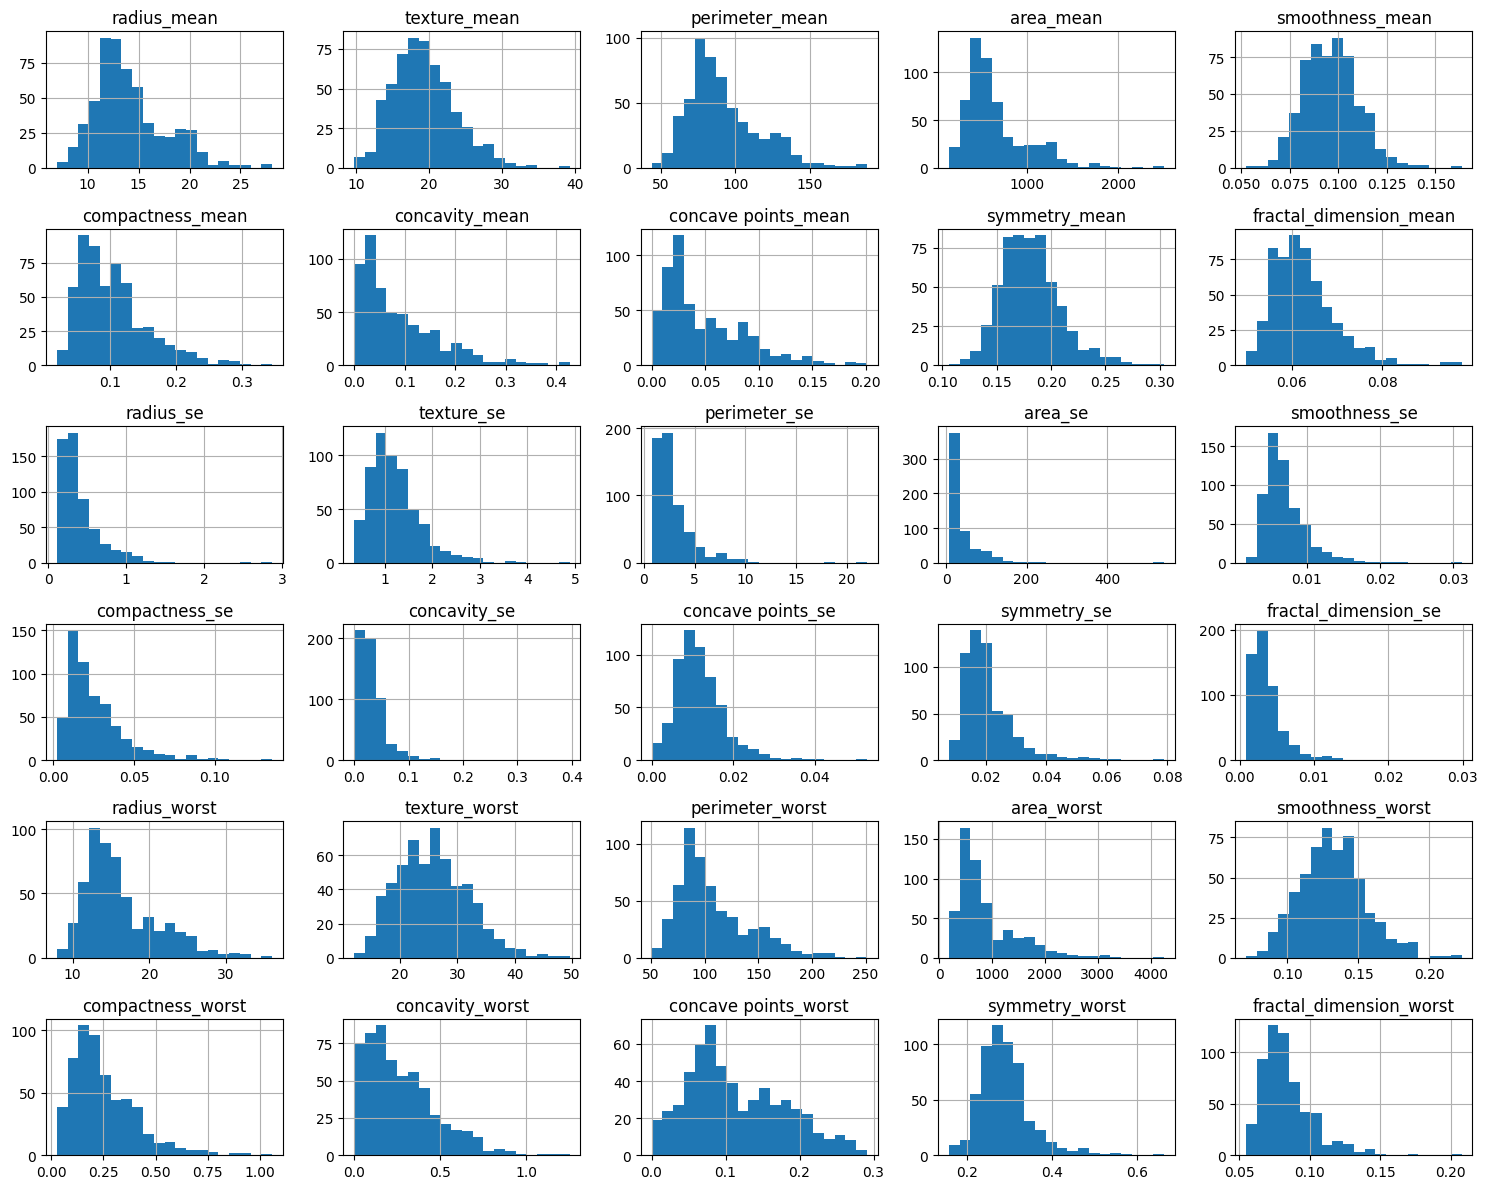

In [43]:
# Histograms of features
plt.figure(figsize=(15, 12))
X_df = pd.DataFrame(X, columns=df.columns[2:])
X_df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

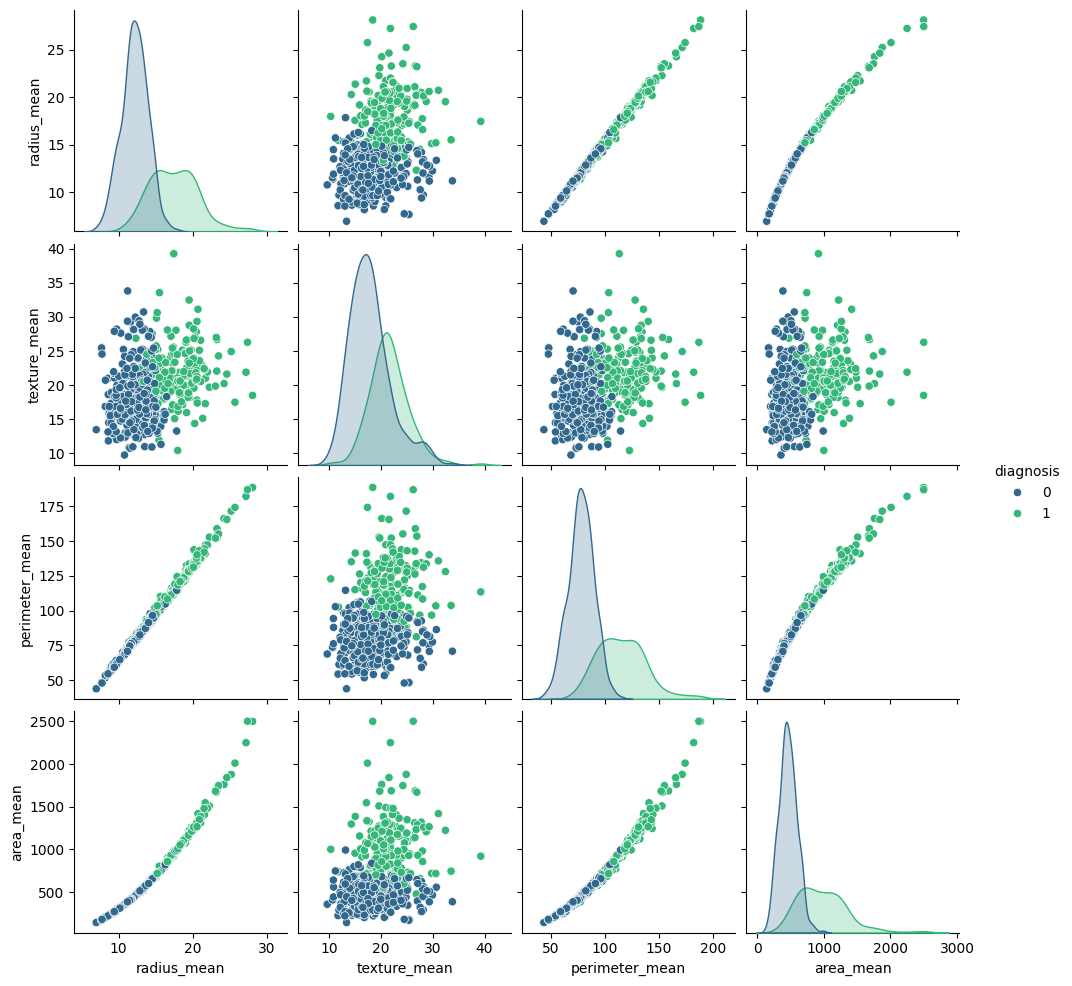

In [44]:
#Pair plot for the first 4 features
plt.figure(figsize=(10, 8))
sns.pairplot(pd.concat([X_df.iloc[:, :4], pd.Series(y, name='diagnosis')], axis=1), 
             hue='diagnosis', palette='viridis')
plt.show()


# SVM implementation

## SVM with GridSearchCV for Hyperparameter Tuning

This cell performs hyperparameter tuning for the Support Vector Machine (SVM) model using `GridSearchCV` to optimize the kernel, regularization parameter (`C`), and gamma values.

- **Parameters Searched**:
  - `kernel`: ['linear', 'poly', 'rbf']
  - `C`: [0.1, 1, 10, 100]
  - `gamma`: ['scale', 'auto', 0.1, 0.01]
- **Cross-Validation**: 5-fold cross-validation.
- **Scoring Metric**: Accuracy.
- **Configuration**:
  - `probability=True`: Enables probability estimates for ROC curve analysis.
  - `random_state=42`: Ensures reproducibility.

In [45]:
# SVM with GridSearchCV for kernel and C tuning
param_grid = {'kernel': ['linear', 'poly', 'rbf'], 
              'C': [0.1, 1, 10, 100],
              'gamma': ['scale', 'auto', 0.1, 0.01]}

svm = SVC(probability=True, random_state=42)
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy', verbose=1)

In [46]:
# Best SVM model
best_svm = grid.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

In [47]:
print("Best SVM Parameters:", grid.best_params_)

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [48]:
# SVM Performance
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)


In [49]:
# print SVM Performance
print(f"SVM Best Parameters: {grid.best_params_}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM Precision: {svm_precision:.4f}")
print(f"SVM Recall: {svm_recall:.4f}")
print(f"SVM F1-Score: {svm_f1:.4f}")
print("SVM Confusion Matrix:")
print(svm_conf_matrix)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.9825
SVM Precision: 0.9839
SVM Recall: 0.9683
SVM F1-Score: 0.9760
SVM Confusion Matrix:
[[107   1]
 [  2  61]]

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# Learning Curve Analysis for Support Vector Machine (SVM) Classifier

This section generates and visualizes the learning curve for the Support Vector Machine (SVM) classifier to evaluate its performance as the training set size increases. The learning curve helps assess whether the model is overfitting, underfitting, or could benefit from additional data.

## SVM Learning Curve Code

The learning curve is computed using scikit-learn's `learning_curve` function, which evaluates the training and validation accuracy across different training set sizes with 5-fold cross-validation.

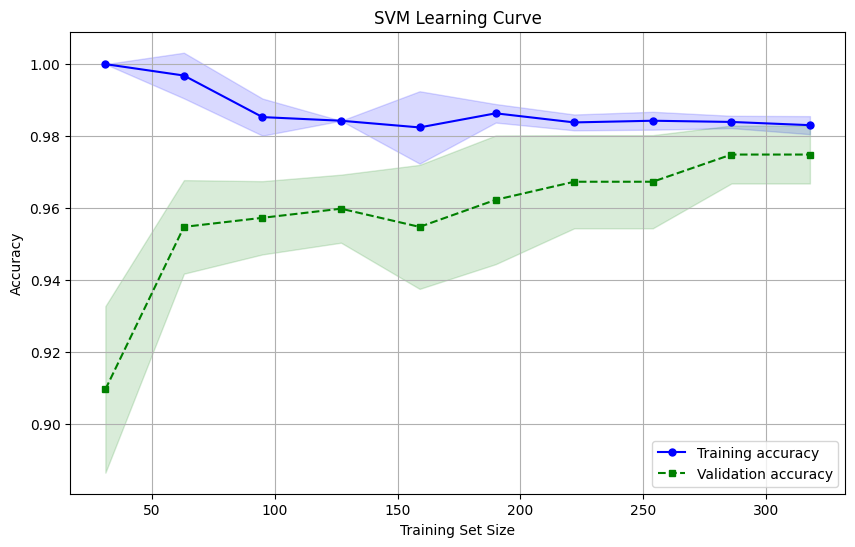

In [50]:
# Plot SVM learning curve to assess overfitting/underfitting
train_sizes, train_scores, test_scores = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, 
         label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, 
         linestyle='--', label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, 
                 alpha=0.15, color='green')
plt.title('SVM Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# Neural Network implemention

## Neural Network Pipeline for Breast Cancer Classification

This section defines a machine learning pipeline for the Neural Network classifier (MLPClassifier) using scikit-learn's `Pipeline` to streamline data preprocessing and model training. The pipeline includes standardization of features followed by the Neural Network model.

### Pipeline Definition

The pipeline consists of two steps:
1. **Scaler**: Standardizes the features using `StandardScaler` to ensure all features have a mean of 0 and a standard deviation of 1, which is crucial for Neural Network performance.
2. **MLPClassifier**: Implements a Multi-layer Perceptron (Neural Network) with a maximum of 1000 iterations and a fixed random state for reproducibility.

In [51]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, random_state=42))
])

## Hyperparameter Tuning for Neural Network Classifier

This section defines the hyperparameter grid for tuning the `MLPClassifier` within the machine learning pipeline using scikit-learn's `GridSearchCV`. The grid specifies various configurations for the Neural Network to optimize its performance on the Breast Cancer Wisconsin dataset.

### Hyperparameter Grid Definition

The parameter grid focuses on key hyperparameters of the `MLPClassifier` to explore different activation functions, network architectures, regularization strengths, and early stopping settings.

In [52]:
param_grid = {
    'mlp__activation': ['relu', 'logistic', 'tanh'],        
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__alpha': [1e-4, 1e-3, 1e-2],                       # L2 regularization
    'mlp__early_stopping': [True],                          # stop when val score plateaus
    'mlp__n_iter_no_change': [10]                           # patience for early stopping
}

In [53]:
# Grid search with 5‑fold CV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(max_iter=1000,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'logistic', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001, 0.01],
                         'mlp__early_stopping': [True],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'mlp__n_iter_no_change': [10]},
             scoring='accuracy', verbose=2)

In [54]:
# Retrieve best model and params 
best_model = grid_search.best_estimator_
print("Best parameters:")
print(grid_search.best_params_)


Best parameters:
{'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (100,), 'mlp__n_iter_no_change': 10}


In [55]:
# Evaluate on train and test
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc  = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f" Testing Accuracy: {test_acc:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print()

cm = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):")
print(cm)

Training Accuracy: 0.9623
 Testing Accuracy: 0.9708

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Confusion Matrix (Test Set):
[[105   3]
 [  2  61]]


In [56]:
#Retrieve best model and make predictions
best_model = grid_search.best_estimator_

# Predict on both train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)


In [57]:
# Compute metrics
train_acc     = accuracy_score(y_train, y_train_pred)
test_acc      = accuracy_score(y_test,  y_test_pred)
mlp_precision = precision_score(y_test, y_test_pred)
mlp_recall    = recall_score(y_test,    y_test_pred)
mlp_f1        = f1_score(y_test,        y_test_pred)
mlp_cm        = confusion_matrix(y_test, y_test_pred)
mlp_test_acc   = accuracy_score(y_test, best_model.predict(X_test))

In [58]:

print(f"Neural Network Best Parameters: {grid_search.best_params_}")
print(f"Neural Network Training Accuracy: {train_acc:.4f}")
print(f"Neural Network Testing Accuracy:  {test_acc:.4f}")
print(f"Neural Network Precision:         {mlp_precision:.4f}")
print(f"Neural Network Recall:            {mlp_recall:.4f}")
print(f"Neural Network F1-Score:          {mlp_f1:.4f}")

print("\nNeural Network Confusion Matrix:")
print(mlp_cm)

print("\nNeural Network Classification Report:")
print(classification_report(y_test, y_test_pred))

Neural Network Best Parameters: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (100,), 'mlp__n_iter_no_change': 10}
Neural Network Training Accuracy: 0.9623
Neural Network Testing Accuracy:  0.9708
Neural Network Precision:         0.9531
Neural Network Recall:            0.9683
Neural Network F1-Score:          0.9606

Neural Network Confusion Matrix:
[[105   3]
 [  2  61]]

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Plot Neural Network Loss Curve

This cell plots the loss curve for the Neural Network (MLPClassifier) to visualize the model's convergence during training.

- **Data**: Uses `best_mlp.loss_curve_` to access the loss values at each iteration.
- **Visualization**:
  - Plots loss against the number of iterations.
  - Includes a title, axis labels, and a grid for clarity.
  - Figure size set to 10x6 for better readability.

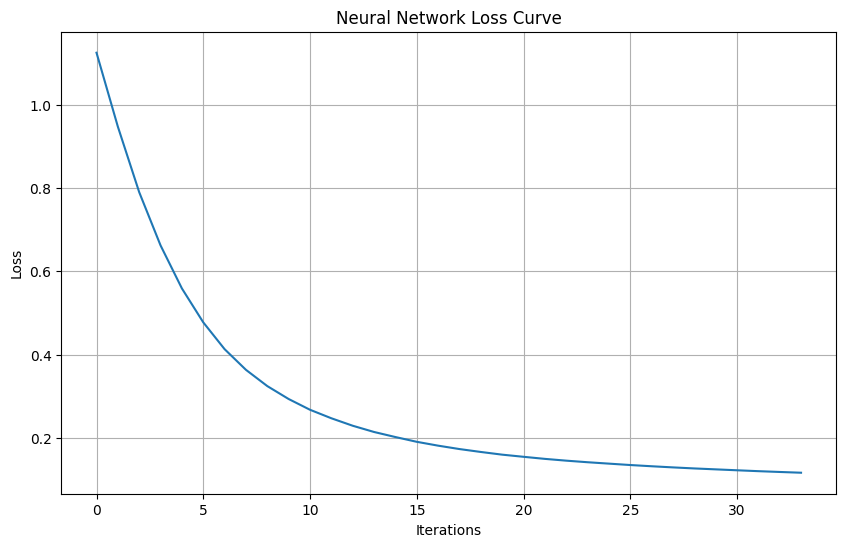

In [59]:
# Plot Neural Network loss curve
plt.figure(figsize=(10, 6))
plt.plot(best_model.named_steps['mlp'].loss_curve_)
plt.title('Neural Network Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


# Learning Curve Analysis for Neural Network Classifier

This section generates and visualizes the learning curve for the `MLPClassifier` to evaluate its performance as the training set size increases. The learning curve helps assess whether the model benefits from more data, exhibits overfitting, or requires further tuning.

## Learning Curve Code

The learning curve is computed using scikit-learn's `learning_curve` function, which evaluates the training and validation accuracy across different training set sizes with 5-fold cross-validation.

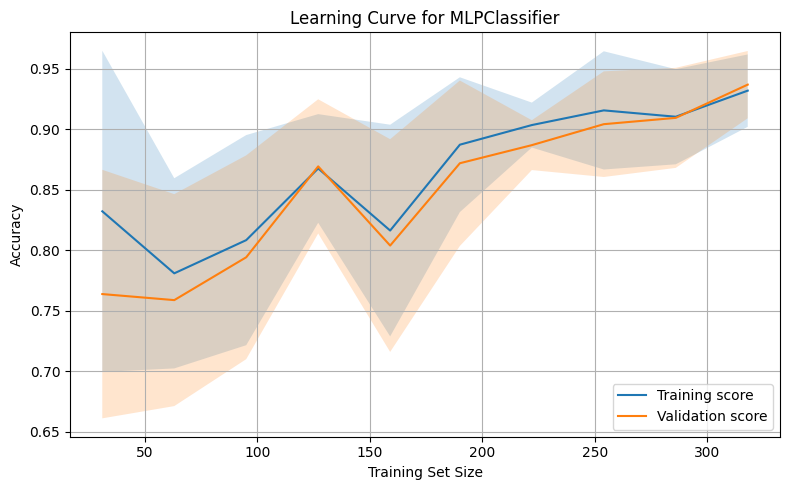

In [60]:
# Plot Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std  = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes,
                 train_mean - train_std,
                 train_mean + train_std,
                 alpha=0.2)
plt.plot(train_sizes, valid_mean, label='Validation score')
plt.fill_between(train_sizes,
                 valid_mean - valid_std,
                 valid_mean + valid_std,
                 alpha=0.2)

plt.title('Learning Curve for MLPClassifier')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


# comparison implemention

In [61]:
# Performance metrics comparison
metrics = {
    'SVM': {
        'Accuracy': svm_accuracy,
        'Precision': svm_precision,
        'Recall': svm_recall,
        'F1-Score': svm_f1
    },
    'Neural Network': {
        'Accuracy': mlp_test_acc,
        'Precision': mlp_precision,
        'Recall': mlp_recall,
        'F1-Score': mlp_f1
    }
}

print("\nModel Comparison Metrics:")
for model_name, scores in metrics.items():
    print(f"{model_name}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")



Model Comparison Metrics:
SVM:
  Accuracy: 0.9825
  Precision: 0.9839
  Recall: 0.9683
  F1-Score: 0.9760
Neural Network:
  Accuracy: 0.9708
  Precision: 0.9531
  Recall: 0.9683
  F1-Score: 0.9606


<Figure size 1200x800 with 0 Axes>

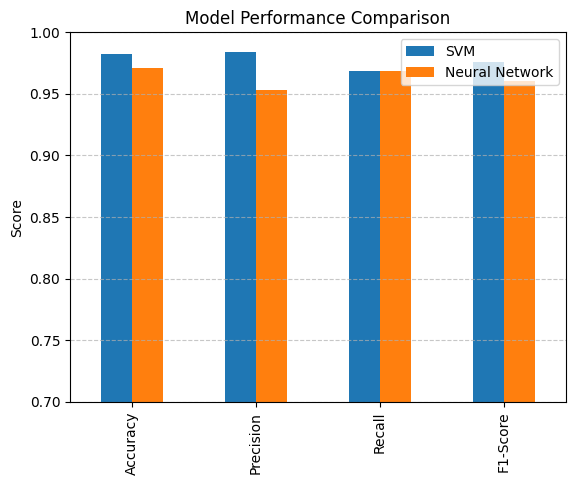

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [62]:
# Bar chart to compare metrics
plt.figure(figsize=(12, 8))
metrics_df = pd.DataFrame(metrics)
metrics_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0.7, 1.0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ROC Curves
plt.figure(figsize=(10, 8))

# ROC Curve for Support Vector Machine (SVM) Classifier

This section generates the Receiver Operating Characteristic (ROC) curve for the Support Vector Machine (SVM) classifier to evaluate its performance in distinguishing between benign and malignant tumors in the Breast Cancer Wisconsin dataset. The Area Under the Curve (AUC) is calculated to quantify the model's discriminative ability.

## SVM ROC Curve Code

The ROC curve is plotted using the predicted probabilities from the optimized SVM model, comparing the True Positive Rate (TPR) against the False Positive Rate (FPR).

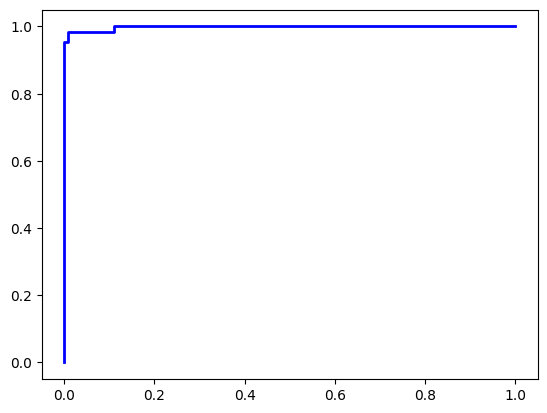

In [63]:
# SVM ROC
y_pred_svm_proba = best_svm.predict_proba(X_test_scaled)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, 'b-', linewidth=2, label=f'SVM (AUC = {auc_svm:.3f})')

# ROC Curve for Neural Network (MLPClassifier)

This section generates and visualizes the Receiver Operating Characteristic (ROC) curve for the Neural Network classifier (`MLPClassifier`) to evaluate its performance in classifying tumors as benign or malignant in the Breast Cancer Wisconsin dataset. The Area Under the Curve (AUC) is calculated to quantify the model's discriminative ability.

## Neural Network ROC Curve Code

The ROC curve is plotted using the predicted probabilities from the optimized Neural Network model, comparing the True Positive Rate (TPR) against the False Positive Rate (FPR).

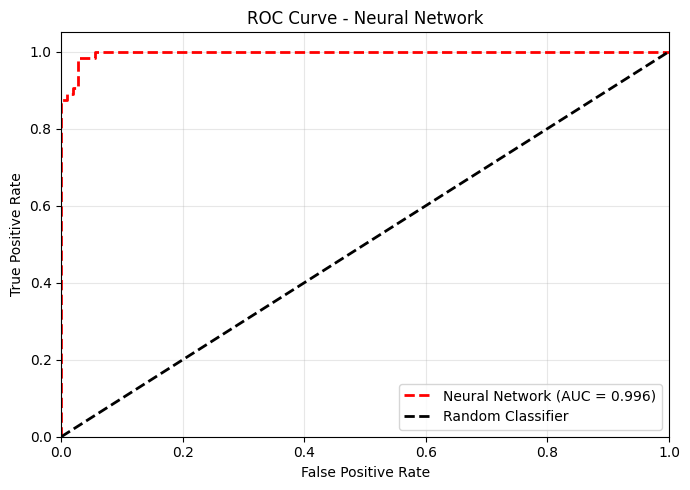

In [64]:
# ROC Curve for Neural Network (MLPClassifier) 
y_proba_nn = best_model.predict_proba(X_test)[:, 1]  
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(7, 5))
plt.plot(fpr_nn, tpr_nn, 'r--', linewidth=2, label=f'Neural Network (AUC = {auc_nn:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [65]:
# Overfitting/Underfitting Check
svm_train_acc = accuracy_score(y_train, best_svm.predict(X_train_scaled))
svm_test_acc  = accuracy_score(y_test,  best_svm.predict(X_test_scaled))

mlp_train_acc = accuracy_score(y_train, best_model.predict(X_train))
mlp_test_acc  = accuracy_score(y_test,  best_model.predict(X_test))

print("Training vs. Test Accuracy")
print(f"SVM Training Accuracy: {svm_train_acc:.4f}, Test Accuracy: {svm_test_acc:.4f}")
print(f"Neural Network Training Accuracy: {mlp_train_acc:.4f}, Test Accuracy: {mlp_test_acc:.4f}")


Training vs. Test Accuracy
SVM Training Accuracy: 0.9824, Test Accuracy: 0.9825
Neural Network Training Accuracy: 0.9623, Test Accuracy: 0.9708


In [66]:
# Overfitting/Underfitting Analysis 
if svm_train_acc - svm_test_acc > 0.1:
    print("SVM may be overfitting. Consider regularization or feature selection.")
if mlp_train_acc - mlp_test_acc > 0.1:
    print("Neural Network may be overfitting. Consider regularization or early stopping.")
if svm_test_acc < 0.8:
    print("SVM may be underfitting. Try a more complex kernel or parameter tuning.")
if mlp_test_acc < 0.8:
    print("Neural Network may be underfitting. Try a deeper architecture or tuning.")

print("\nModel Selection:")
if svm_test_acc > mlp_test_acc:
    diff = (svm_test_acc - mlp_test_acc) * 100
    print(f"SVM outperforms Neural Network by {diff:.2f}%")
elif mlp_test_acc > svm_test_acc:
    diff = (mlp_test_acc - svm_test_acc) * 100
    print(f"Neural Network outperforms SVM by {diff:.2f}%")
else:
    print("Both models perform equally well.")



Model Selection:
SVM outperforms Neural Network by 1.17%
